# Regression Exercise 1: Linear Regression

In this exercise, we will apply our linear regression skills on a few artificial datasets.

It is recommended to use [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for this question.

## Part 1: Adding Noise

**Questions:**
1. Sample 1000 data points (x) from a uniform distribution over $(1,10)$. (Hint: use np.random.uniform.)
2. Sample noise $n$ from $\mathcal{N}(0, 100)$ ($\sigma^2 = 100$) for each data point. Define $y = 5x + 2$ and plot $y’=y + n$ with plt.scatter(..., alpha=0.2). (Hint: Use np.random.normal, and be careful not to confuse variance and standard deviation.)
3. Perform linear regression to generate $\hat{y}$, an approximation of $y$, using $x$ and $y'$. Plot $\hat{y}$ on top of the plot from question 2.
4. What is the equation for the regression line (to two decimal places)? (See .coef_ and .intercept_ attributes in LinearRegression.) The result should be close to, but not equal to, the line from question 1.
5. Compute the $R^2$ score using LinearRegression.score().
6. If we instead sampled noise $n$ from $\mathcal{N}(0, 36)$ in question 2, what $R^2$ score would we get? Why?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#1.
x = np.random.uniform(1,10,1000)

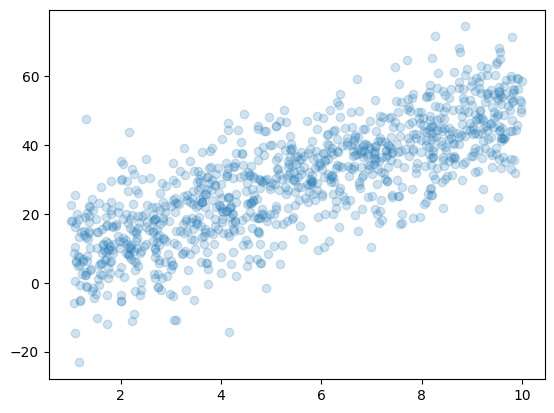

In [3]:
#2.
n = np.random.normal(0,10,size = x.shape)
a = 5
b = 2

y_true = a * x + b

y = y_true + n

plt.scatter(x, y , alpha = 0.2)

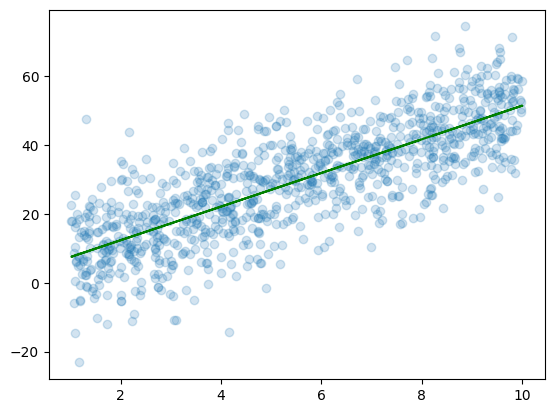

In [4]:
#3.
X = x[:,None]
reg = LinearRegression().fit(X,y)
y_pred = reg.predict(X)

plt.scatter(X,y,alpha = 0.2)
plt.plot(x,y_pred,color = 'green')


In [5]:
#4.
intercept = reg.intercept_
slope = reg.coef_[0]

print(f" The equation of the regression line is y = {round(slope,2)} * x + {round(intercept,2)}")


 The equation of the regression line is y = 4.89 * x + 2.57


In [6]:
#5.
score = reg.score(X,y)
score # 0.627

0.6189973912079463

In [7]:
new_n = np.random.normal(0,6,x.shape)
new_y = y_true + new_n

new_reg = LinearRegression().fit(X,new_y)
y_pred = new_reg.predict(X)

score = new_reg.score(X,new_y)
score # 0.83

# We get a higher score because the variance of the noise is lower.

0.8269027466195991

# Part 2: Anomalous Data

**Questions:**
7. Load the data in *lin_reg.csv* to a pandas data frame, and perform a linear regression on the x and y columns. Print the intercept, coefficient, and $R^2$ values.
8. Plot the residuals for the regression performed on the all rows of the data frame. What do you see?
9. Plot a scatter plot of the x and y values, with the regression line on top. What do you see?
10. How would you improve the linear regression? What would be better intercept and coefficient values? Plot another scatter plot of the x and y values with this improved linear regression line on top.

In [8]:
#7.
df = pd.read_csv('lin_reg.csv')
df.head()

,x,y
0,-3.441813,23.270398
1,-2.720720,17.759720
2,3.076827,1.531452
3,3.039571,-1.212449
4,2.206432,-0.451499


In [9]:
X = df[['x']]
y = df[['y']]


In [10]:
model = LinearRegression()

model.fit(X,y)
y_pred = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r2 = model.score(X,y)
r2

0.0016777473401009546

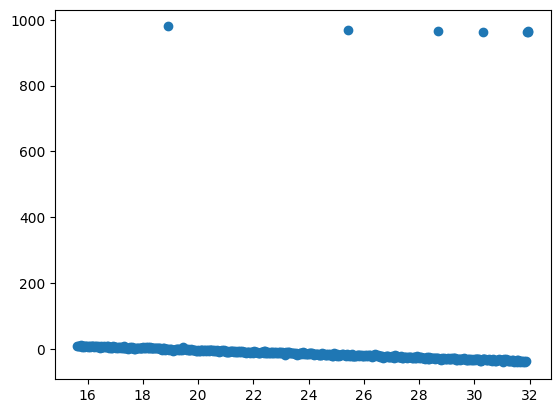

In [11]:
#8.
residuals = y - y_pred
plt.scatter(y_pred,residuals)


Residuals are close to 0

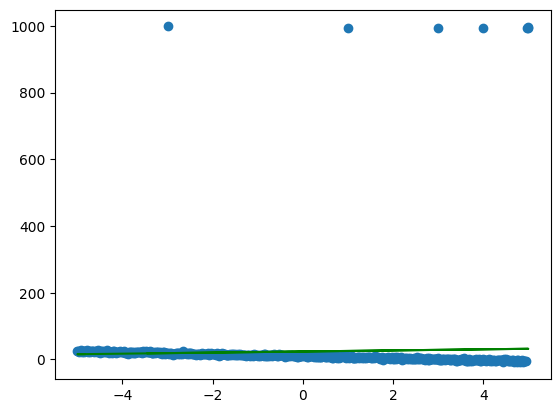

In [12]:
plt.scatter(df.x,df.y)
plt.plot(df.x,y_pred, color = 'green')

The regression line is very close to the predected values

In [13]:
#10.
# I would improve the linear regression by deleting the outliers and then find a better intercept and slope.
# An intercept of 0 would be a better one

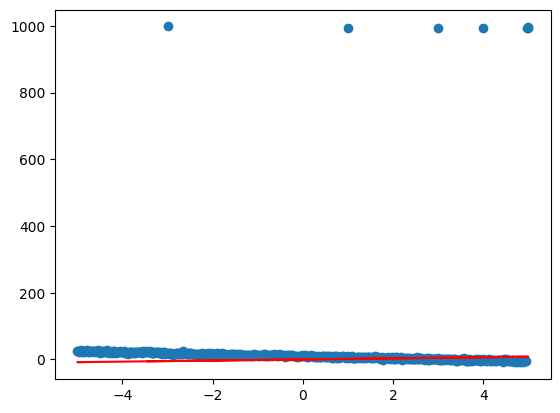

In [14]:
plt.scatter(df.x,df.y)
plt.plot(df.x, slope*df.x, color = 'red')